In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/drive/MyDrive/Prodigy/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 1959 images belonging to 2 classes.


In [24]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/drive/MyDrive/Prodigy/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


Creating Models

In [25]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [26]:
from tensorflow.keras.regularizers import l2

In [27]:
cnn = tf.keras.models.Sequential()

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [29]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [33]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [34]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [36]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.5058 - loss: 1.0001 - val_accuracy: 0.4998 - val_loss: 0.9785
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 477ms/step - accuracy: 0.5172 - loss: 0.9702 - val_accuracy: 0.6565 - val_loss: 0.8663
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.6301 - loss: 0.7986 - val_accuracy: 0.6965 - val_loss: 0.7804
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 515ms/step - accuracy: 0.6652 - loss: 0.7381 - val_accuracy: 0.7019 - val_loss: 0.7630
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.6616 - loss: 0.7410 - val_accuracy: 0.7271 - val_loss: 0.7210
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 650ms/step - accuracy: 0.6898 - loss: 0.6618 - val_accuracy: 0.7365 - val_loss: 0.6287
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 515ms/step - accuracy: 0.6800 - loss: 0.6840 - val_accuracy: 0.7528 - val_loss: 0.6243
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 530ms/step - accuracy: 0.7087 - loss: 0.6463 - val_accura

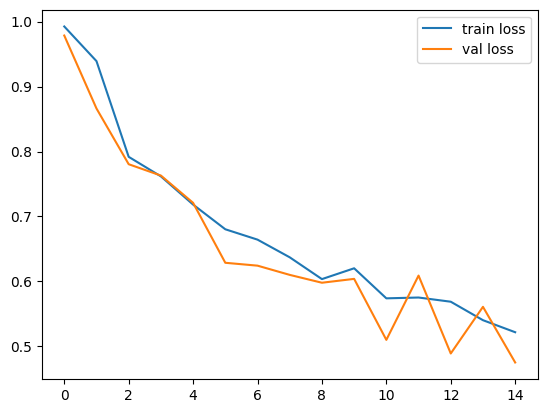

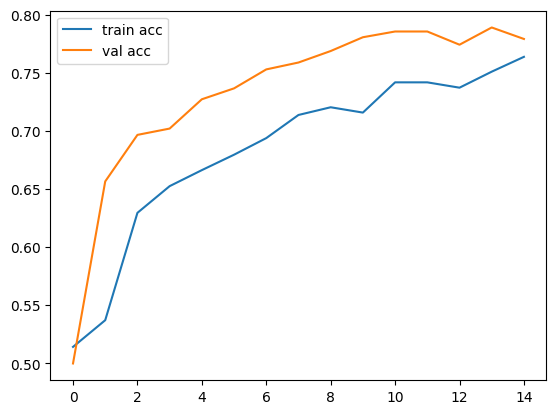

In [42]:
# plot the loss
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [43]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [45]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Prodigy/training_set/dogs/dog.1023.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [46]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
